# Comparación entre los Datasets

**Autor**: *Jorge Díaz Rosique*

**Fecha**: 08/12/2022

**Descripción**: Carga los conjuntos de datos anteriores para compararlos con los nuevos obtenidos.

**Revisiones**:
* Revisión 0.01 - Archivo creado


In [ ]:
#### Instalación de algunas librerias ####
!pip install seaborn==0.12.1
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 4.8 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#### Importación de liberías ####

# Librerías para realizar el preprocesamiento básico y cargar y guardar datos
import os
import numpy as np
import pandas as pd
import copy
from sklearn import preprocessing

# Librerías para la representación gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

#GDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials

# Carga y preproceso de los datos

Este apartado tiene como objetivo obtener un `dataset` preparado para la posterior extracción de información del mismo. Para ello, este se dividirá en dos partes bien diferenciadas. Por un lado se cargarán los datos, realizando todos los preliminares necesarios para ellos. Posteriormente, en segundo lugar,
se preprocesarán para cumplir con el objetivo propuesto.

## Preliminares

Para la correcta carga de los datos, es necesario realizar algunos pasos técnicos. En este caso, puesto que la información se encuentra en Google Drive, se necesitará montar para poder acceder a él.

In [ ]:
# Autentificación de Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Se comprueba que esta montado con el siguiente comando de consola
!ls -l -h

total 8.0K
drwx------ 6 root root 4.0K Dec 27 18:14 drive
drwxr-xr-x 1 root root 4.0K Dec 20 20:19 sample_data


Visto esto, también se dispondrá de una lista con los nombres de los diferentes ficheros a cargar y procesar.

In [ ]:
#### Definición de listas con los ficheros ####

# Lista de nombres
benchmarks = ['aes_128', 'bitcount1', 'bitcount2', 'bubblesort', 'crc_32_short',
              'fir_short', 'heapsort', 'insertsort', 'maddconst', 'mmult',
              'mmultconst', 'mmultvector', 'quicksort', 'sha_short', 'tarai']

# Lista de .csv
benchmarks_csv = [bench + '.csv' for bench in benchmarks]

## Carga de datos

Principalmente, se utilizará lo poco visto hasta el momento junto a `pandas` para la carga de datos.

Para actuar de forma óptima, sería conveniente cargar un conjunto de datos para comenzar a observar su estructura antes de cargarlo todo de golpe. Sin embargo, es necesario recordar que estos conjuntos de datos han sido generados por el código mostrado en **Create_Dataset_004.ipynb**.

Por lo tanto, conociendo ya la estructura, se cargarán los diferentes conjuntos en un solo `DataFrame` de `pandas`. Gracias a que la columna `bench` de cada archivo `.csv`contiene información sobre el benchmark al que corresponde dicha información, luego se podrá trabajar por se parado si se requiere.

In [ ]:
#### Carga de datos ####

# Ruta de los ficheros
route = '/content/drive/MyDrive/ML4FT/data/datasets/'

# Carga y unión de los datos
first = True

for csv in benchmarks_csv:
    if first:
        data = pd.read_csv(route + csv, sep = ';')
        first = False
    else:
        temp = pd.read_csv(route + csv, sep = ';')
        data = pd.concat([data, temp])

In [ ]:
#### Carga de datos ANTERIORES ####

# Ruta de los ficheros
route = '/content/drive/MyDrive/ML4FT/data/datasets/anteriores/'

# Carga y unión de los datos
first = True

for csv in benchmarks_csv:
    if first:
        data_previous = pd.read_csv(route + csv, sep = ';')
        first = False
    else:
        temp = pd.read_csv(route + csv, sep = ';')
        data_previous = pd.concat([data_previous, temp])

Tras esto, se puede mostrar la información del conjunto cargado.

In [ ]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10896 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bench              10896 non-null  object 
 1   ind                10896 non-null  object 
 2   r0                 10896 non-null  int64  
 3   r1                 10896 non-null  int64  
 4   r2                 10896 non-null  int64  
 5   r3                 10896 non-null  int64  
 6   r4                 10896 non-null  int64  
 7   r5                 10896 non-null  int64  
 8   r6                 10896 non-null  int64  
 9   r7                 10896 non-null  int64  
 10  r8                 10896 non-null  int64  
 11  r9                 10896 non-null  int64  
 12  sl                 10896 non-null  int64  
 13  fp                 10896 non-null  int64  
 14  ip                 10896 non-null  int64  
 15  sp                 10896 non-null  int64  
 16  lr                 1089

In [ ]:
# Información del dataset ANTERIOR
data_previous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12943 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bench              12943 non-null  object 
 1   ind                12943 non-null  object 
 2   r0                 12943 non-null  int64  
 3   r1                 12943 non-null  int64  
 4   r2                 12943 non-null  int64  
 5   r3                 12943 non-null  int64  
 6   r4                 12943 non-null  int64  
 7   r5                 12943 non-null  int64  
 8   r6                 12943 non-null  int64  
 9   r7                 12943 non-null  int64  
 10  r8                 12943 non-null  int64  
 11  r9                 12943 non-null  int64  
 12  sl                 12943 non-null  int64  
 13  fp                 12943 non-null  int64  
 14  ip                 12943 non-null  int64  
 15  sp                 12943 non-null  int64  
 16  lr                 1294

## Preproceso de datos

Debido a la propia obtención de estos conjuntos, esta tarea se simplifica en gran medida, ya que los datos se encuentran tal y como se han requerido. Sin embargo, es necesario hacer algunas transformaciones.

Debido a que este trabajo se centra en los tiempos de vida de los registros y los soft errors que sucenden en ellos, no se tendrán en cuenta las tasas de error *overall*. Es decir, aquellas que abarcan también errores en la memoria y no solo en los registros.

In [ ]:
# Copia de los datos para no trabajar con los originales
datos = data.copy()
datos_anteriores = data_previous.copy()

In [ ]:
#### Eliminación de columnas innecesarias ####

# Uso de .drop
datos.drop(['ft_overall','sdc_overall','hang_overall'], axis=1, inplace=True)
datos_anteriores.drop(['ft_overall','sdc_overall','hang_overall'], axis=1, inplace=True)

# Reinicio de los indicies
datos.reset_index(drop = True, inplace = True)
datos_anteriores.reset_index(drop = True, inplace = True)

Ahora, es el momento de modificar artificialmente el dataset anterior para ver si se asemeja al actual.

In [ ]:
#### Modificación dataset ANTERIOR ####

## Inicialización de las variables

csv_extension = '_db_info.csv' # Extensión .csv
global_path = '/content/drive/MyDrive/ML4FT/data/datasets/info/' # Ruta de los datos
registers = ['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9','r10','r11','r12','sp','lr','pc']
all_info_db = []

## Comienza el bucle

for bench in benchmarks:
    # Se crea un csv para cada uno de los benchmarks
    info_path = global_path + bench + csv_extension
    info_db = pd.read_csv(info_path, sep=",")
    
    # Se suman las tasas de los errores
    for register in registers:
        info_db[register + '_rate'] = info_db[register + '_sdc'] + info_db[register + '_hang']

    # Se eliminan el resto de variables
    info_db['bench'] = bench
    info_db_clean = info_db[['bench','ind']+[register+'_rate' for register in registers]]
    
    # Se añade a una lista
    all_info_db.append(info_db_clean)

all_info_db = pd.concat(all_info_db)
all_info_db.drop_duplicates (subset = ['bench','ind'], inplace = True)
all_info_db.reset_index(drop = True, inplace = True)

In [ ]:
#### Modificación dataset ANTERIOR ####

## Bucle que modifica el dataset anterior
for i in range(all_info_db.shape[0]):
    bench = all_info_db['bench'][i]
    ind = all_info_db['ind'][i]

    for j, register in enumerate(registers):
        register_rate = all_info_db[register + '_rate'][i]

        # Si vale 0 se modifica
        if register_rate == 0:
            index = datos_anteriores[(datos_anteriores['bench']==bench) &
                                     (datos_anteriores['ind']==ind)].index
            if len(index)!=0:
                datos_anteriores.iloc[index[0],j+2] = 0

In [ ]:
#### Join de los dos datasets ####
#registers = ['r0','r1','r2','r3','r4','r5','r6','r7','r8','r9','sl','fp','ip','sp','lr']
registers = ['r0','r1','r2','r3','r4','r5','r6','r7','sl','fp','ip','sp','lr']

# Unión
union_datos = pd.merge(datos_anteriores, datos, how = 'inner', on = ['bench','ind'])
union_datos = union_datos[['bench','ind','cycles_x','cycles_y'] +
                          [register + '_x' for register in registers] +
                          [register + '_y' for register in registers]]

# Diferencias
for register in registers:
    union_datos[register+'_diff'] = union_datos[register+'_x']/union_datos['cycles_x'] - union_datos[register+'_y']/union_datos['cycles_y']

# Cuadrados
for register in registers:
    union_datos[register+'_square'] = union_datos[register+'_diff']*union_datos[register+'_diff']

# Distancia entre si mismo
distancia_individuos = pd.DataFrame(union_datos[[register + '_square' for register in registers]].sum(axis=1)**(1/2),
                                    columns = ['distancia'])
distancia_individuos['bench'] = union_datos['bench']

# Distancia media
distancia_registros = distancia_individuos.groupby(by='bench').mean()

In [ ]:
# Se define la paleta de colores

palette_gray = sns.color_palette("Greys", n_colors = 17)
palette_gray = palette_gray.as_hex()[5:13] + palette_gray.as_hex()[5:12][::-1]

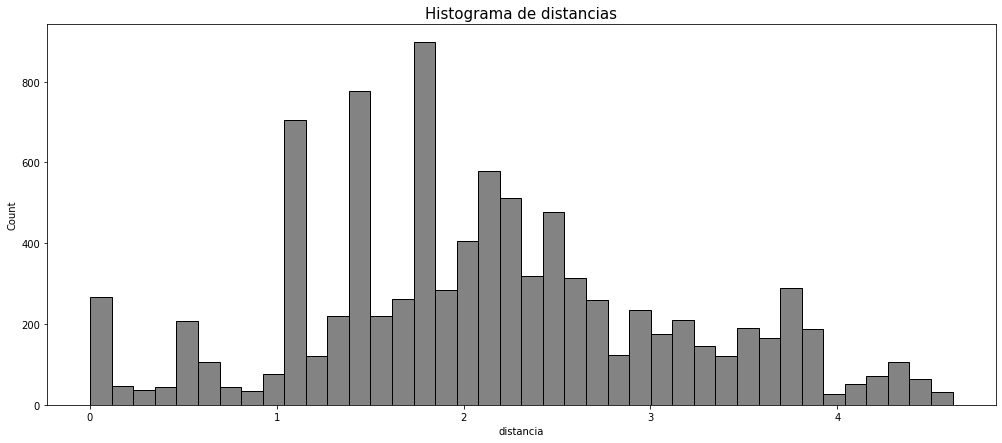

In [ ]:
# Se realiza el mapa de calor
plt.figure(figsize=(17, 7))

# Dibujo
sns.histplot(x='distancia', data=distancia_individuos[distancia_individuos['distancia']<=10], color = palette_gray[7])

# Personalización
plt.yticks(rotation=0)
plt.title('Histograma de distancias', fontsize = 15)

plt.show()

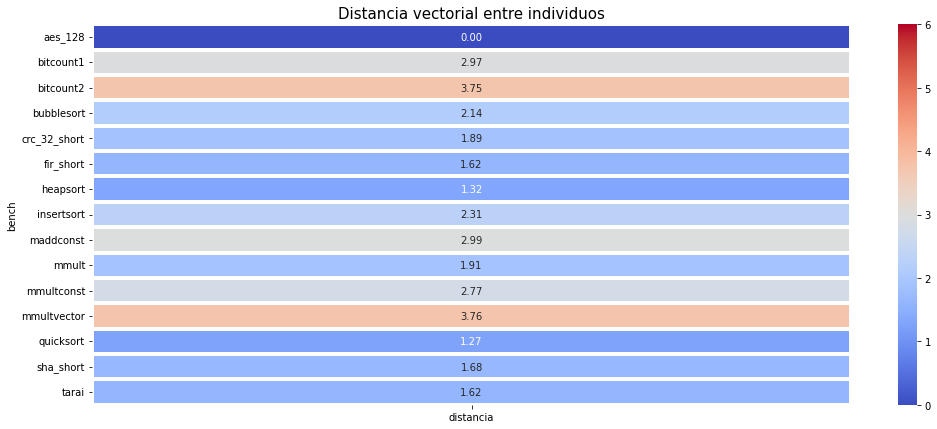

In [ ]:
# Se realiza el mapa de calor
plt.figure(figsize=(17, 7))

# Dibujo
sns.heatmap(distancia_registros, annot=True, fmt='.2f',
            linewidth=3, cmap='coolwarm',
            vmin = 0, vmax=6)

# Personalización
plt.yticks(rotation=0)
plt.title('Distancia vectorial entre individuos', fontsize = 15)

plt.show()

Tras esto se procederá a eliminar los valores a típicos para un mejor aprovechamiento de los datos. Por eso mismo, a continuación se observará la distribución de la variable dependiente para cada uno de los benchmarks. En concreto, puesto que se tienen dos variables, se sumarán para una visualización única.

In [ ]:
# Obtención de la suma de las tasas SDC y HANG
datos['rf_sdc_hang'] = datos['rf_sdc'] + datos['rf_hang']

In [ ]:
# Se define la paleta de colores

palette_gray = sns.color_palette("Greys", n_colors = 17)
palette_gray = palette_gray.as_hex()[5:13] + palette_gray.as_hex()[5:12][::-1]

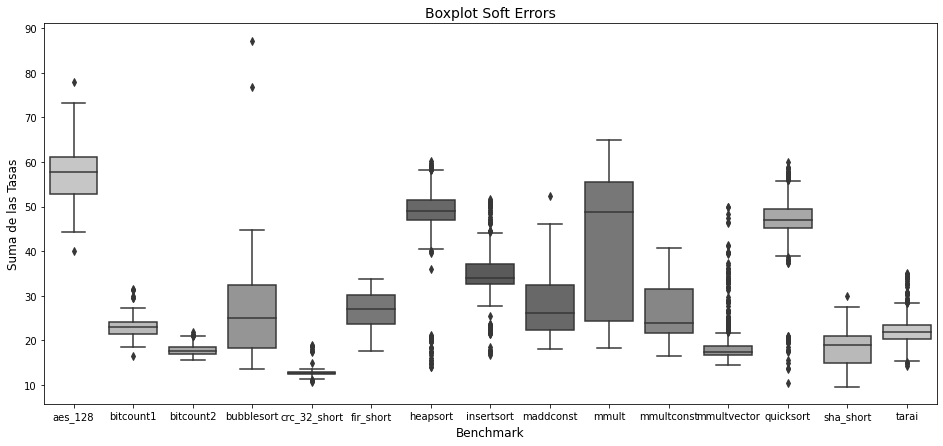

In [ ]:
# Boxplot Tasa Soft Errors

plt.figure(figsize = (16,7))
sns.boxplot(x='bench',y = 'rf_sdc_hang',data = datos, palette = palette_gray)

# Personalización
plt.xlabel('Benchmark', fontsize = 12)
plt.ylabel('Suma de las Tasas', fontsize = 12)
plt.title('Boxplot Soft Errors',fontsize=14)

plt.show()

Se observa una gran cantidad de datos atípicos para según que benchmarks. Por ejemplo, `mmultvector` o `quicksort`. Sin embargo, para otros como `fir_short` o `mmult` aparentan datos bien distribuidos. Así pues, se procederá a eliminar dichos datos anómalos usando el recorrido intercuartílico. Es decir, calcular para cada algoritmo $$IQR = Q_3 - Q_1,$$ obtener el intervalo $$[Q_1-1'5*IQR,Q_3+1'5*IQR]$$ y descartar a todo individuo que no este contenido por el mismo.

Destacar que, es posible que no se eliminen todos o, por otro lado, que se eliminen más de los necesarios. Pero con este criterio se asegura la obtención de una mejor estructura para el conjunto de datos.

# Análisis Descriptivo

Terminada la primera parte de este fichero, la siguiente se centrará en la obtención de un primer análisis que describan los datos que se tienen. En este, se fijará el foco en observar las relaciones entre las diferentes variable para identificar las más significativas, información relevante para comprender el conjunto, diferencias y similitudes entre los diferentes benchmarks...

Todo ello pensando en uno de los objetivos principales de este trabajo, crear una red o algoritmo que dado un vector de entrada estime la fiabilidad frente a soft errors. Por ello, el estudio de la relación entre la entrada y la salida sera fundamental.

## Correlación de las variables

En primer lugar, se obtendrá un mapa de calor con las correlaciones entre las variables para poder descartar aquellas que no correlen con las tasas de error. Para ello, se deberán normalizar los datos para evitar irregularidades en el calculo de estas correlaciones.

Claramente, se deberán descartar para este análisis todas las variables no numéricas.

In [ ]:
# Estandarización de los datos
center = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(
    datos.drop(['bench','ind'], axis = 1, inplace = False).values)
datos_std = center.transform(
    datos.drop(['bench','ind'], axis = 1, inplace = False).values)
datos_std = pd.DataFrame(datos_std, columns = datos.drop(
    ['bench','ind'], axis = 1, inplace = False).columns)

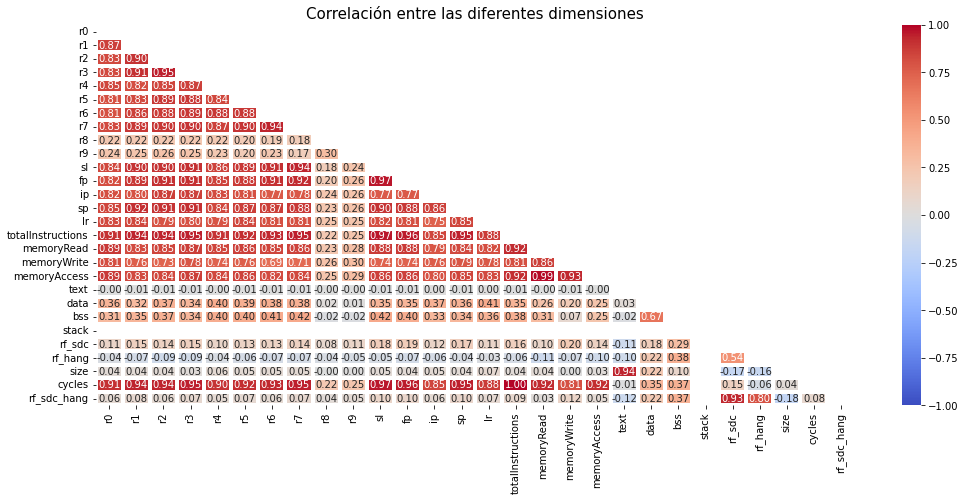

In [ ]:
  # Correlación entre las variables
datos_corr = datos_std.corr()

# Se realiza el mapa de calor
plt.figure(figsize=(17, 7))

# Dibujo
sns.heatmap(datos_corr, annot=True, fmt='.2f',
            linewidth=3, cmap='coolwarm', mask=np.triu(datos_corr),
            vmin = -1, vmax=1)

# Personalización
plt.yticks(rotation=0)
plt.title('Correlación entre las diferentes dimensiones', fontsize = 15)

plt.show()

Se puede observar que los resultados no son muy alentadores. Tanto la tasa $SDC$ como la tasa $HANG$ mantienen pocas correlaciones con el resto de variables. Esto nos impide eliminar alguna característica actualmente.

Por otro lado, se observa que los registros están bastante correlados entre sí. Esto indica que tienen un comportamiento bastante similar y, por lo tanto, en los siguientes análisis se utilizará el registro $R_0$ como representante del grupo.